In [48]:
# Empire AI Automation Setup
# Version: 0.1
#
# Copy and paste this as 1st cell into Your workbook to start making automation notebook
# Use the #Factory# page to create new steps
# More videos and tutorials @link
# by Kaspar Kallas 2023 (kaspar.kana.kallas@gmail.com)

try:
    test = time.time()
except:
    import pyperclip
    import platform
    import time
    import pyautogui as gui
    import io
    import cv2
    import numpy as np
    import codecs
    import dill
    import pandas as pd
    import pyarrow.feather as feather
    from ipywidgets import widgets, Image, Output

class step:
    """
    Empire AI step protocol 0.1
    Inputs step('''xxx''', tries=3, timer=1, gate=1, bbox=None)
    Output step.locations (tuples of x,y in screen space)
    
    """
    def __init__(self, payload, tries=3, timer=1, gate=1, bbox=None, kill_on_fail=True):
        self.payloads = dill.loads(codecs.decode(payload.encode(), "base64"))
        self.pattern_img = self.payloads[0]
        self.offset = self.payloads[1]
        self.kill_on_fail = kill_on_fail
        self.version = 0.1
        
        # Try to find the pattern
        for counter in range(tries):
            self._find_()
            # If enough instances have been found break out of the loop and execute next cell
            if len(self.locations) >= gate:
                print("found: "+str(self.locations))
                break
            else:
                time.sleep(timer)
        
        # If the pattern is not found within timeout
        if len(self.locations) < gate:
            pr.style={'bar_color': '#800000'}
            pl.value="[STOPPED] could not find"
            print("EXCEPTION: Gate condition not met!")
            if kill_on_fail:
                pr.style={'bar_color': '#808000'}
                raise Exception("Gate condition not met!")
        
    def _find_(self):
        """
        Find pattern on the screen as many instances as possible
        save all found locations into self.locations with correct click offset
        """
        
        self.locations = []
        locations_found = gui.locateAllOnScreen(self.pattern_img)
        offset = self.payloads[1]
        
        for loc in locations_found:
            self.locations.append((loc.left+offset[0],loc.top+offset[1]))
            
def os_ctrl(short=False):
    """
    Control buton string replacement to be used with pyautogui lib
    in win/linux it is ctrl and osx cmd/command
    """
    if platform.system() == 'Darwin':
        if short:
            return 'cmd'
        else:
            return 'command'
    else:
        return 'ctrl'
    
# Initalize progress bar and show it the notebook is ran standalone
try:
    pr.value = 0
    pr.style={'bar_color': None}
    #pl.value = ""
except:
    pr = widgets.IntProgress(min=0,max=100,layout=widgets.Layout(width='90%'), description="progress: ")
    pl = widgets.Label(description="debug")
    pr.value = 0 
# right click, create new view for output to have this as progress overview
widgets.VBox([pr,pl])

### 1. File->
open file menu

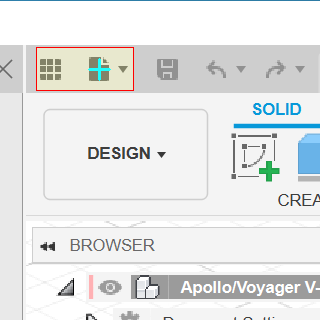 

In [43]:
# Empire AI Automation Step Setup
s = step(
    '''gASVHTEAAAAAAACMCVBJTC5JbWFnZZSMBUltYWdllJOUKYGUXZQofZSMA1JHQpRLYUsrhpROQuEwAADMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMyEhISEhIRmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMyamprMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMyEhISEhIRmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMyamprMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMyEhIRmZmZmZmZmZmZmZmZmZmbMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMxmZmZmZmZmZmZmZmaEhISEhITMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMxmZmaampqamprMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMxmZmZmZmZmZmaamprMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMxmZmZmZmZmZmaamprMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMxmZmZmZmZmZmZmZmaampqamprMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMyKiopmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmaDg4PMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzHx8dzc3NmZmZmZmZmZmZmZmZmZmZmZmZvb2/Dw8PMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMy1tbVnZ2dmZmZmZmZmZmZmZmZnZ2exsbHMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMyZmZlmZmZmZmZmZmZmZmaVlZXMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzLy8t9fX1mZmZmZmZ7e3vKysrMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMy/v79ra2tra2u+vr7MzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMynp6enp6fMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMyEhIRmZmZmZmZmZmZmZmZmZmbMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMxmZmZmZmZmZmZmZmaEhISEhITMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMyEhIRmZmZmZmZmZmZmZmZmZmbMzMxmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMxmZmZmZmZmZmZmZmaEhISEhITMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMxmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmbMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMyEhISEhIRmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmaEhISEhITMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMyUZWJLQEsXhpSGlC4=''',
    tries=3,
    timer=1,
    gate=1,
    bbox=None
)
# Logic here
for i in s.locations:
    gui.click(i[0],i[1])
    #gui.moveTo(i[0],i[1])
    #gui.dobleClikc(i[0],i[1])
    #gui.hotkey(os_ctrl(),'v')
    #%run ./subworkflowfile.ipynb

found: [(676, 70)]


In [44]:
pr.value = 25
pr.description = "progress 25%"

### 2. ->Export...
click on export...

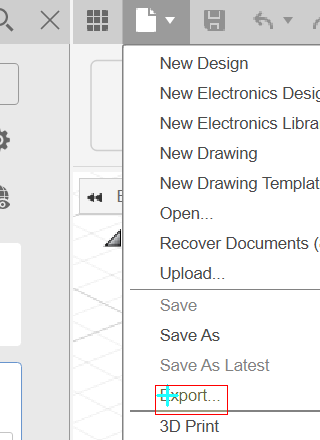

In [45]:
# Empire AI Automation Step Setup
s = step(
    '''gASVtBgAAAAAAACMCVBJTC5JbWFnZZSMBUltYWdllJOUKYGUXZQofZSMA1JHQpRLSEsdhpROQngYAAD/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////46hqSEhISEhISEhISEhISEhISEhISEhISEhIisb////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////GikiKxv//////////////////////////////////////////////////////////////////////////////////////////////////////////46hqSEhqqOP/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////46hqSEiKxv//////////////////////////////////////////////////////////////////////////////////////////////////////////46hqSEhqqOP/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////46hqSEiKxv//////////////////////////////////////////////////////////////////////////////////////////////////////////46hqSEhqqOP//////////////////////////////8aKSEhISIrG///////////GikhISEiKxv//xopISGqoxqhqSEhISEhISEhqqOP////////////////jqGpISEhISEhISEhIisb//////////+OoakhqqKiKSEhISEhIX2pISEhISEhISEhIaqjj////////////////////////////////////////////////////////////////////////////////////////////////////46hqSEhqqOP/////////////////////////////////46hqSEhIisb/////xopISEhqqOP/////xopISEhISGqo4///////46hqSEhqqOP////////GikhISGqo4////////8aKSEhIaqjj/////+OoakhISEiKxv//////////46hqSEiKxv//////////////////////////////////////////////////////////////////////////////////////////////////////////46hqSEhISEhISEhISEhISEhISEhISEhISGqo4//////////jqGpISEiKxsaKSEhIaqjj////////xopISEiKxv/////////////jqGpISIrG////46hqSEiKxv//////////////xopISEiKxv///+OoakhIaqjj////////////46hqSEiKxv//////////////////////////////////////////////////////////////////////////////////////////////////////////46hqSEhqqOP//////////////////////////////////////+OoakhISEhISGqo4///////////xopISGqo4///////////////xopISEiKxv//xopISGqo4////////////////8aKSEhqqOP//+OoakhIisb/////////////46hqSEiKxv//////////////////////////////////////////////////////////////////////////////////////////////////////////46hqSEhqqOP/////////////////////////////////////////xopISEhIisb/////////////xopISIrG////////////////46hqSEiKxv/jqGpISGqo4////////////////8aKSEhqqOP//+OoakhIisb/////////////46hqSEiKxv//////////////////////////////////////////////////////////////////////////////////////////////////////////46hqSEhqqOP//////////////////////////////////////8aKSEhISEhISEiKxv//////////xopISGqo4///////////////xopISEiKxv//xopISGqo4////////////////8aKSEhqqOP//+OoakhIisb/////////////46hqSEiKxv//////////////////////////////////////////////////////////////////////////////////////////////////////////46hqSEhqqOP////////////////////////////////////GikhISGqo4//GikhISIrG////////xopISEiKxv/////////////jqGpISIrG////46hqSEhqqOP/////////////xopISEiKxv///+OoakhIisb/////////////46hqSEiKxv//////////////////////////////////////////////////////////////////////////////////////////////////////////46hqSEhqqOP/////////////////////////////////xopISEhqqOP//////8aKSEhIisb/////xopISEhISIrG////////xopISEhqqOP////////GikhISGqo4////////8aKSEhIaqjj/////+OoakhIisb//////////////8aKSEhqqOP/////////////////////////////////////////////////////////////////////////////////////////////////////////46hqSEhISEhISEhISEhISEhISEhISEhISEhISIrG46hqSEhIaqjj////////////xopISEhIisb/xopISGqoqIpISEhISEhISEiKxv/////////////////jqGpISEhISEhISEhqqOP//////////+OoakhIisb////////////////GikhISEhISIrG///jqGpISGqo4////////+OoakhIaqjj////////xopISEiKxv//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////xopISGqo4///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////xopISGqo4///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////xopISGqo4/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+AgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgID///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+UZWJLDUsLhpSGlC4=''',
    tries=3,
    timer=1,
    gate=1,
    bbox=None
)
# Logic here
for i in s.locations:
    gui.click(i[0],i[1])
    # clean up the filename
    gui.hotkey(os_ctrl(),'c')
    
    filename = pyperclip.paste()
    filename = filename.replace("/","")
    pyperclip.copy(filename)
    
    gui.hotkey(os_ctrl(),'v')

found: [(697, 445)]
ApolloVoyager V-mount Battery Mount [STHC000000159] v1


In [ ]:
pr.value = 50
pr.description = "progress 50%"

### 3. [Export]
click Export in the pop up dialog

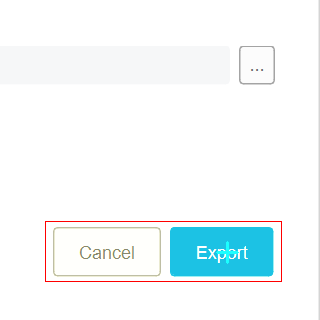

In [ ]:
# Empire AI Automation Step Setup
s = step(
    '''gASVLKYAAAAAAACMCVBJTC5JbWFnZZSMBUltYWdllJOUKYGUXZQofZSMA1JHQpRL7Es8hpROQvClAAD////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////6+vrU1NS0tLSjo6OioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKjo6O1tbXV1dX6+vr////////////////////////////////////////////u+v5axu0LqeMBp+MApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIWruVTw+zJ7Pn////////////////////////////////////////////////////////////////////6+vqmpqaioqK9vb3Dw8PIyMjOzs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7IyMjDw8O9vb2ioqKmpqb6+vr////////////////////////////////////v+v4HqOIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIDp+IApuJyzu/////////////////////////////////////////////////////////////////V1dWioqLLy8v6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrKysqioqLV1dX///////////////////////////////////+I1vEApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIBpuISreTy+v7///////////////////////////////////////////////////////////+1tbW9vb36+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vq8vLy2trb///////////////////////////////////8rtOcApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuK25vf///////////////////////////////////////////////////////////+jo6PDw8P6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrDw8Ojo6P///////////////////////////////////8Cp+MApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuJlye3///////////////////////////////////////////////////////////+ioqLIyMj6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrIyMiioqL///////////////////////////////////8ApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuJwzu////////////////////////////////////////////////////////////+ioqLOzs76+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrOzs6ioqL///////////////////////////////////8ApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuKA0/H///////////////////////////////////////////////////////////+ioqLOzs76+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrOzs6ioqL///////////////////////////////////8ApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuKA0/H///////////////////////////////////////////////////////////+ioqLOzs76+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrOzs6ioqL///////////////////////////////////8ApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuKA0/H///////////////////////////////////////////////////////////+ioqLOzs76+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrOzs6ioqL///////////////////////////////////8ApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuKA0/H///////////////////////////////////////////////////////////+ioqLOzs76+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrOzs6ioqL///////////////////////////////////8ApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuKA0/H///////////////////////////////////////////////////////////+ioqLOzs76+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrOzs6ioqL///////////////////////////////////8ApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuKA0/H///////////////////////////////////////////////////////////+ioqLOzs76+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrOzs6ioqL///////////////////////////////////8ApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuKA0/H///////////////////////////////////////////////////////////+ioqLOzs76+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrOzs6ioqL///////////////////////////////////8ApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuKA0/H///////////////////////////////////////////////////////////+ioqLOzs76+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrOzs6ioqL///////////////////////////////////8ApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuKA0/H///////////////////////////////////////////////////////////+ioqLOzs76+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrOzs6ioqL///////////////////////////////////8ApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuKA0/H///////////////////////////////////////////////////////////+ioqLOzs76+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrOzs6ioqL///////////////////////////////////8ApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuKA0/H///////////////////////////////////////////////////////////+ioqLOzs76+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrOzs6ioqL///////////////////////////////////8ApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuKA0/H///////////////////////////////////////////////////////////+ioqLOzs76+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrOzs6ioqL///////////////////////////////////8ApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuKA0/H///////////////////////////////////////////////////////////+ioqLOzs76+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrNnmxsbGxsbGxsbGxsbGyFtuP6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+uO2hWxsns36+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrOzs6ioqL///////////////////////////////////8ApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApueQ8f////////////////////////////////+2xOIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIAtvHb4uwApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuKA0/H///////////////////////////////////////////////////////////+ioqLOzs76+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr647aFbGxshbbj+vr6+vr6+vr647aFbGxshbbj+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+uO2hWxsns36+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrOzs6ioqL///////////////////////////////////8ApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApueQ8f////////////////////////////////+2xOIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApueQ8f//4uwApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuKA0/H///////////////////////////////////////////////////////////+ioqLOzs76+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+s2ebGxsns36+vr6+vr6+vr6+vr6+vr6zZ5sbGxsns36+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+uO2hWxsns36+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrOzs6ioqL///////////////////////////////////8ApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApueQ8f//8fE6puIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApueQ8f//4uwApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuKA0/H///////////////////////////////////////////////////////////+ioqLOzs76+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrNnmxsbIW24/r6+vr6+vr6+vr6+vr6+vr6+uO2hWxsbJ7N+vr6+vr6+vrjtoVsbGxsbGxsbGxsbGyFtuP6+vr6+vr6+uO2hWxsns3jtoVsbGxsbGxsbGyFtuP6+vr6+vr6+vr6+vr647aFbGxsbGxsbGxsbIW24/r6+vr6+vr6+vr647aFbGxsbGxsbGxsbIW24/r6+vr6+vr6+uO2hWxsns36+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrOzs6ioqL///////////////////////////////////8ApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApueQ8f//8fE6puIApuIApuIApuIApuIApuIApuIApuIApuJm4v////+2xOIApuIApuIApuy2//////VmpuIAtvHb//+2xOy2////////////8fE6puIApuIApuIApuIApuI61Pr/////////////8fE6puIApuIApuIAtvHb//+21PHb////////8fbD//////////////+2xOIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuKA0/H///////////////////////////////////////////////////////////+ioqLOzs76+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+uO2hWxshbbj+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrjtoVsbIW24/r6+vr6+vrjtoVsbGyFtuP6+vr6+uO2hWxsbGxsns36+vr6+vr6zZ5sbGyezfr6+vr6+vr6zZ5sbGyFtuP6+vr6+vrNnmxsbIW24/r6+vr6zZ5sbGyFtuP6+vr6+vrjtoVsbGyezfr6+vr6+uO2hWxsns36+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrOzs6ioqL///////////////////////////////////8ApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApueQ8f//8fE6puIApuIApuIApuIApuIApuIApuIApuIApuIApuy2//////VmpuIApuJm4v////+2xOIApuIAtvHb///////b1OcApuIApueQ8f////VmpuIApuIApuJm4v////qQtuIApuIApueQ8f////VmpuIApuIAtvHb//////qQtuIApuIApuIApueQ8f//4uwApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuKA0/H///////////////////////////////////////////////////////////+ioqLOzs76+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+s2ebGxsns36+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+s2ebGxsns36+vr6+vr6+vr6+s2ebGxsns36+vr6+uO2hWxsbJ7N+vr6+vr6+vr6+uO2hWxsns36+vr6+uO2hWxshbbj+vr6+vr6+vr6+s2ebGxsns36+uO2hWxsns36+vr6+vr6+vr6+vrNnmxshbbj+vr6+uO2hWxsns36+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrOzs6ioqL///////////////////////////////////8ApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApueQ8f////////////////////////////////VmpuIApuIApuIAxPX////b1OcAxPX////b1OcApuIApuIAtvHb////8fE6puIApuIApuIAtvHb///b1OcApuIAxPX///+2xOIApuIApuIApuIAtvHb///b1OcApuIAtvHb////4uwApuIApuIApuIApueQ8f//4uwApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuKA0/H///////////////////////////////////////////////////////////+ioqLOzs76+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr647aFbGxsns36+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+uO2hWxsns36+vr6+uO2hWxshbbj+vr6+vr6+vr6+uO2hWxshbbj+vr647aFbGyFtuP6+vr6+vr6+vr6+vr6+vr6+vr647aFbGyFtuP6+vr6+vr6+vr6+vrjtoVsbIW24/r6+uO2hWxsns36+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrOzs6ioqL///////////////////////////////////8ApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApueQ8f////////////////////////////////VmpuIApuIApuIApuJm4v//////////8fE6puIApuIApuIAtvHb///b1OcApuIApuIApuIApueQ8f//8fE6puJm4v////VmpuIApuIApuIApuIApuJm4v//8fE6puIAtvHb///b1OcApuIApuIApuIApueQ8f//4uwApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuKA0/H///////////////////////////////////////////////////////////+ioqLOzs76+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+s2ebGxsns36+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr647aFbGxsbGxsbGxsbGxshbbj+vr6+uO2hWxshbbj+vr6+vr6+vr6+uO2hWxshbbj+vr6zZ5sbGyezfr6+vr6+vr6+vr6+vr6+vr6+vr6zZ5sbGxsbGxsbGxsbGxsbGxsbGxsbGxsbGyezfr6+uO2hWxsns36+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrOzs6ioqL///////////////////////////////////8ApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApueQ8f//8fE6puIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuy2//////qQtuIApuIApuIApuIAtvHb//+2xOIApuIApuIApuIApuJm4v////VmpuJm4v//8fE6puIApuIApuIApuIApuJm4v////VmpuIAtvHb///b1OcApuIApuIApuIApueQ8f//4uwApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuKA0/H///////////////////////////////////////////////////////////+ioqLOzs76+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+uO2hWxshbbj+vr6+vr6+vr6+vr6+vr6+vr6+vrjtoVsbGyezfr6+vrNnmxsbGxsbGxsbGxsns36+uO2hWxshbbj+vr6+uO2hWxshbbj+vr6+vr6+vr6+uO2hWxshbbj+vr6zZ5sbGyezfr6+vr6+vr6+vr6+vr6+vr6+vr6zZ5sbGyezfr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+uO2hWxsns36+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrOzs6ioqL///////////////////////////////////8ApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApueQ8f//8fE6puIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIAtvHb///////b1OcApuIApuIApuIAtvHb//+2xOIApuIApuIApuIApuJm4v////VmpuJm4v//8fE6puIApuIApuIApuIApuJm4v////VmpuIAtvHb///b1OcApuIApuIApuIApueQ8f//4uwApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuKA0/H///////////////////////////////////////////////////////////+ioqLOzs76+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrjtoVsbIW24/r6+vr6+vr6+vr6+vr6+vr6+uO2hWxsbJ7N+vr647aFbGxsns36+vr6+vr6+vr6+uO2hWxshbbj+vr6+uO2hWxshbbj+vr6+vr6+vr6+uO2hWxshbbj+vr647aFbGyFtuP6+vr6+vr6+vr6+uO2hWxshbbj47aFbGyFtuP6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+uO2hWxsns36+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrOzs6ioqL///////////////////////////////////8ApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApueQ8f//8fE6puIApuIApuIApuIApuIApuIApuIApuIApuIApuIApueQ8f//8fFm1Pr///qQtuIApuIApuIAtvHb//+2xOIApuIApuIApuIApueQ8f//8fE6puJm4v////VmpuIApuIApuIApuIApueQ8f//8fE6puIAtvHb///b1OcApuIApuIApuIApueQ8f//4uwApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuKA0/H///////////////////////////////////////////////////////////+ioqLOzs76+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+s2ebGxsns36+vr6+vr6+vr6+vr6+vr6zZ5sbGyFtuP6+vr6zZ5sbGyezfr6+vr6+vr6+vr647aFbGxshbbj+vr6+uO2hWxshbbj+vr6+vr6+vr6+uO2hWxshbbj+vr6+uO2hWxsns36+vr6+vr6+vr6+s2ebGyFtuP6+uO2hWxshbbj+vr6+vr6+vr6+vrNnmxsbIW24/r6+uO2hWxsns36+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrOzs6ioqL///////////////////////////////////8ApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApueQ8f//8fE6puIApuIApuIApuIApuIApuIApuIApuIApuIApuI61Pr///+2xOIApuy2////8fE6puIApuIAtvHb////4uwApuIApuIApuIAtvHb///b1OcApuIAxPX///+2xOIApuIApuIApuIAtvHb////4uwApuIAtvHb///b1OcApuIApuIApuIApueQ8f//4uwApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuKA0/H///////////////////////////////////////////////////////////+ioqLOzs76+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6zZ5sbGxshbbj+vr6+vr6+vr6zZ5sbGxsns36+vr6+vr647aFbGxshbbj+vr6+vr6+s2ebGxsbGxshbbj+vr6+uO2hWxshbbj+vr6+vr6+vr6+uO2hWxshbbj+vr6+vr6zZ5sbGyFtuP6+vr6+vrNnmxsbJ7N+vr6+vr6zZ5sbGxsns36+vr6+vr6zZ5sbGyFtuP6+vr6+uO2hWxsns36+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrOzs6ioqL///////////////////////////////////8ApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApueQ8f//////////////////////////////////4uwApuIAtvHb////4uwApuIApuIAxPX////b1OcApuIAtvHb///////b1OcApuIApueQ8f//8fE6puIApuIApuJm4v////qQtuIApuIApueQ8f////VmpuIApuIAtvHb///b1OcApuIApuIApuIApueQ8f//8fE6puIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuKA0/H///////////////////////////////////////////////////////////+ioqLOzs76+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+uO2hWxsbGxsbGxsbGxsbGyezfr6+vr6+vr6+vr6+vr647aFbGxsbGxsbGxsbJ7N+vrjtoVsbJ7N+vr6+uO2hWxshbbj+vr6+vr6+vr6+uO2hWxshbbj+vr6+vr6+vr647aFbGxsbGxsbGxshbbj+vr6+vr6+vr6+vr647aFbGxsbGxsbGxsbGyezfr6+vr6+vr6+uO2hWxsns36+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrOzs6ioqL///////////////////////////////////8ApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApueQ8f//////////////////////////////////4uwApueQ8f////VmpuIApuIApuIApuJm4v////qQtuIAtvHb///b1PG2////////////4uwApuIApuIApuIApuIApuI61Pr/////////////4uwApuIApuIApuIAtvHb///b1OcApuIApuIApuIApuIAxPX////////b1OcApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuKA0/H///////////////////////////////////////////////////////////+ioqLOzs76+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrOzs6ioqL///////////////////////////////////8ApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIAtvHb///b1OcApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuKA0/H///////////////////////////////////////////////////////////+ioqLOzs76+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrOzs6ioqL///////////////////////////////////8ApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIAtvHb///b1OcApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuKA0/H///////////////////////////////////////////////////////////+ioqLOzs76+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrOzs6ioqL///////////////////////////////////8ApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIAtvHb///b1OcApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuKA0/H///////////////////////////////////////////////////////////+ioqLOzs76+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrOzs6ioqL///////////////////////////////////8ApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIAtvHb///b1OcApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuKA0/H///////////////////////////////////////////////////////////+ioqLOzs76+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrOzs6ioqL///////////////////////////////////8ApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuKA0/H///////////////////////////////////////////////////////////+ioqLOzs76+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrOzs6ioqL///////////////////////////////////8ApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuKA0/H///////////////////////////////////////////////////////////+ioqLOzs76+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrOzs6ioqL///////////////////////////////////8ApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuKA0/H///////////////////////////////////////////////////////////+ioqLOzs76+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrOzs6ioqL///////////////////////////////////8ApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuKA0/H///////////////////////////////////////////////////////////+ioqLOzs76+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrOzs6ioqL///////////////////////////////////8ApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuKA0/H///////////////////////////////////////////////////////////+ioqLOzs76+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrOzs6ioqL///////////////////////////////////8ApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuKA0/H///////////////////////////////////////////////////////////+ioqLOzs76+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrOzs6ioqL///////////////////////////////////8ApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuKA0/H///////////////////////////////////////////////////////////+ioqLOzs76+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrOzs6ioqL///////////////////////////////////8ApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuKA0/H///////////////////////////////////////////////////////////+ioqK9vb36+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vq9vb2ioqL///////////////////////////////////8ApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuJQwuv///////////////////////////////////////////////////////////+rq6vJycn6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrJycmrq6v///////////////////////////////////8Zr+UFp+MApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuKa3PT////////////////////////////////////////////////////////////BwcGqqqrx8fH6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vrx8fGqqqrBwcH///////////////////////////////////9Uw+wNquQApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuLU8Pr////////////////////////////////////////////////////////////r6+uioqKqqqrq6ur5+fn6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr5+fnp6empqamioqLs7Oz////////////////////////////////////J7PkApuINq+MpteYFqOMApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIzt+f////////////////////////////////////////////////////////////////////MzMyqqqqioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKqqqrMzMz///////////////////////////////////////////9yzu8UreQApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIApuIyt+fe8/v////////////////////////////////////////////////////////////////////////6+vrk5OTHx8fLy8vR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHR0dHLy8vHx8fk5OT6+vr////////////////////////////////////////////////////y+v625vdlye1wzu+A0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/GA0/FQwuua3PTU8Pr///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+UZWJLt0sghpSGlC4=''',
    tries=3,
    timer=1,
    gate=1,
    bbox=None
)
# Logic here
for i in s.locations:
    time.sleep(0.2)
    gui.click(i[0],i[1])
    #gui.moveTo(i[0],i[1])
    #gui.dobleClikc(i[0],i[1])
    #gui.hotkey(os_ctrl(),'v')
    #%run ./subworkflowfile.ipynb

In [ ]:
pr.value = 75
pr.description = "progress 75%"

### 4. close active document
close the current document to not create clutter of open documents

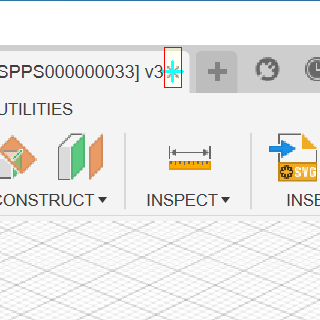

In [54]:
# Jupyter-Automation Step Setup
# Version: 0.1
#
# Default script to be used as a template for copying ready steps to Automation Notebooks
# If the pattern is not found on screen Exception will break the workflow
# by Kaspar Kallas 2023 (kaspar.kana.kallas@gmail.com)
s = step(
    '''gASVNAgAAAAAAACMCVBJTC5JbWFnZZSMBUltYWdllJOUKYGUXZQofZSMA1JHQpRLEUsohpROQvgHAADMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLk5OTk5OTy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLk5OTy8vLy8vLy8vLy8vLk5OSAgICAgIC0tLTy8vLy8vLy8vLy8vLy8vLy8vK0tLS0tLSAgIDk5OTk5OTy8vLy8vLk5OSAgICAgIC0tLTy8vLy8vLy8vLy8vLy8vLy8vK0tLS0tLSAgIDk5OTk5OTy8vLy8vLy8vKzs7Ozs7OAgIC1tbW1tbXy8vLy8vLy8vK0tLSAgICAgIC0tLTy8vLy8vLy8vLy8vLy8vLy8vLy8vKysrKAgICAgIC2tra0tLS0tLSAgIC0tLS0tLTy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vKysrKAgICAgIC2tra0tLS0tLSAgIC0tLS0tLTy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vKysrKysrKAgICAgICAgIC0tLTy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vK0tLS0tLSAgICAgICAgIC2trby8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vK0tLS0tLSAgICAgICAgIC2trby8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vK0tLSAgICAgIC0tLSxsbGxsbGAgIC3t7e3t7fy8vLy8vLy8vLy8vLy8vLy8vK0tLS0tLSAgIC0tLS0tLTy8vLy8vLy8vKxsbGAgICAgIC3t7fy8vLy8vLy8vLy8vLy8vK0tLS0tLSAgIC0tLS0tLTy8vLy8vLy8vKxsbGAgICAgIC3t7fy8vLy8vLy8vLy8vLk5OSAgICAgIC0tLTy8vLy8vLy8vLy8vLy8vLy8vKwsLCwsLCAgIDm5ubm5uby8vLy8vLy8vLk5OTk5OTy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLk5OTy8vLy8vLy8vLy8vLy8vLk5OTk5OTy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLk5OTy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vKUZWJLCUsZhpSGlC4=''',
    tries = 3,
    timer = 1,
    gate = 1,
    bbox = None,
)
# Logic here
for i in s.locations:
    gui.click(i, clicks=1, button='left')
    #gui.moveTo(i[0],i[1])                   # Just move the mouse no click
    #pyperclip.copy(pyperclip.paste()+'\n')  # Copy selected text, add newline character and copy back to clipboard
    #gui.hotkey(os_ctrl(),'v')               # Keypress events
    #%run ./subworkflowfile.ipynb            # Run another Notebook as subworkflow

found: [(1709, 72)]


In [ ]:
pr.value = 100
pr.description = "progress 100%"

In [ ]:
import pyautogui as gui
gui.doubleClick